<a href="https://colab.research.google.com/github/Unholy-Applepie/Boston-Housing-Prediction/blob/main/Final_R_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Prices Prediction
by Akshit Kalita, Jahnavi Tallapally, Mahika Yadav and Honey Sharma

**Installing Packages**

In [ ]:
install.packages('caret')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’




In [ ]:
install.packages('mlbench')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('data.table')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('rpart')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('rpart.plot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [ ]:
library(ggplot2)

In [ ]:
library(mlbench)

**Importing** **Data**

In [ ]:
data(BostonHousing)

head(BostonHousing)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [ ]:
tail(BostonHousing)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
501,0.22438,0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [ ]:
summary(BostonHousing$medv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

In [ ]:
names(BostonHousing)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "b"       "lstat"   "medv"

In [ ]:
var(BostonHousing)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,73.9865782,-40.2159560,23.9923388,-0.122108643,0.419593894,-1.32503785,85.4053223,-6.87672154,46.84776101,844.821538,5.39933079,-302.381816,27.98616788,-30.7185080
zn,-40.2159560,543.9368137,-85.4126481,-0.252925293,-1.396148200,5.11251341,-373.9015482,32.62930405,-63.34869487,-1236.453735,-19.77657066,373.721402,-68.78303690,77.3151755
indus,23.9923388,-85.4126481,47.0644425,0.109668806,0.607073693,-1.88795657,124.5139031,-10.22809746,35.54997135,833.360290,5.69210400,-223.579756,29.58027028,-30.5208228
chas,-0.1221086,-0.2529253,0.1096688,0.064512973,0.002684303,0.01628475,0.6185712,-0.05304296,-0.01629554,-1.523367,-0.06681916,1.131325,-0.09781626,0.4094095
nox,0.4195939,-1.3961482,0.6070737,0.002684303,0.013427636,-0.02460345,2.3859272,-0.18769584,0.61692945,13.046286,0.04739732,-4.020570,0.48894617,-0.4554124
rm,-1.3250378,5.1125134,-1.8879566,0.016284745,-0.024603450,0.49367085,-4.7519292,0.30366342,-1.28381457,-34.583448,-0.54076322,8.215006,-3.07974141,4.4934459
age,85.4053223,-373.9015482,124.5139031,0.618571205,2.385927202,-4.75192919,792.3583985,-44.32937946,111.77084648,2402.690122,15.93692134,-702.940328,121.07772456,-97.5890166
dis,-6.8767215,32.6293041,-10.2280975,-0.053042959,-0.187695836,0.30366342,-44.3293795,4.43401514,-9.06825201,-189.664592,-1.05977455,56.040356,-7.47332906,4.8402286
rad,46.8477610,-63.3486949,35.5499714,-0.016295543,0.616929453,-1.28381457,111.7708465,-9.06825201,75.81636598,1335.756577,8.76071616,-353.276219,30.38544241,-30.5612280
tax,844.8215381,-1236.4537354,833.3602902,-1.523367119,13.046285530,-34.58344778,2402.6901225,-189.66459173,1335.75657653,28404.759488,168.15314053,-6797.911215,654.71451963,-726.2557164


Checking to see if there is missing data


In [ ]:
sum(is.na(BostonHousing))

[1] 0

**Data** **Visualization**

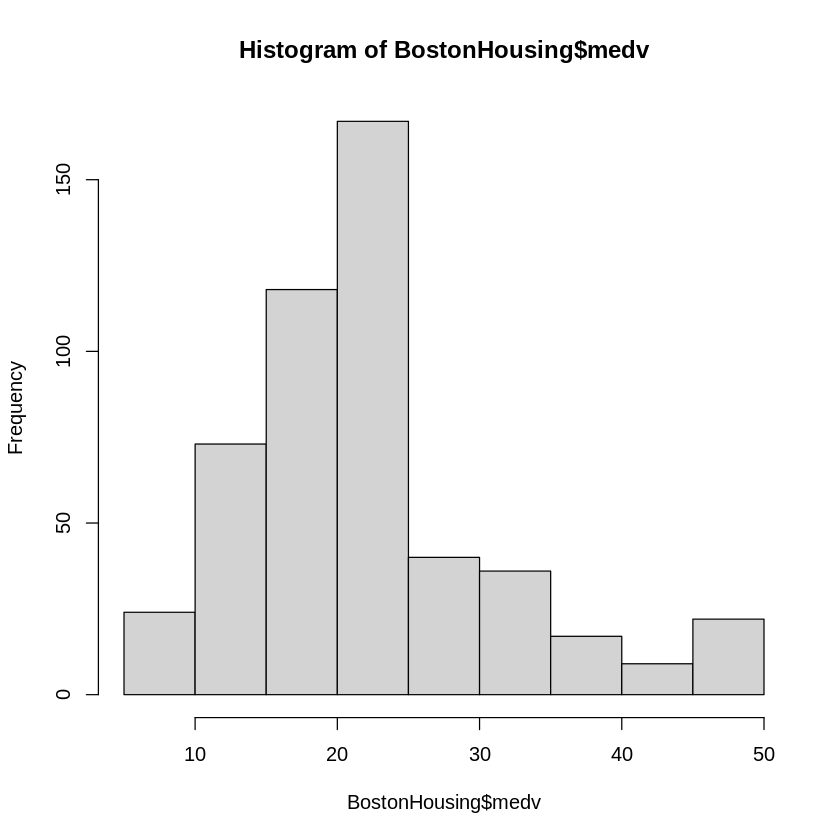

In [ ]:
hist(BostonHousing$medv, breaks=10)

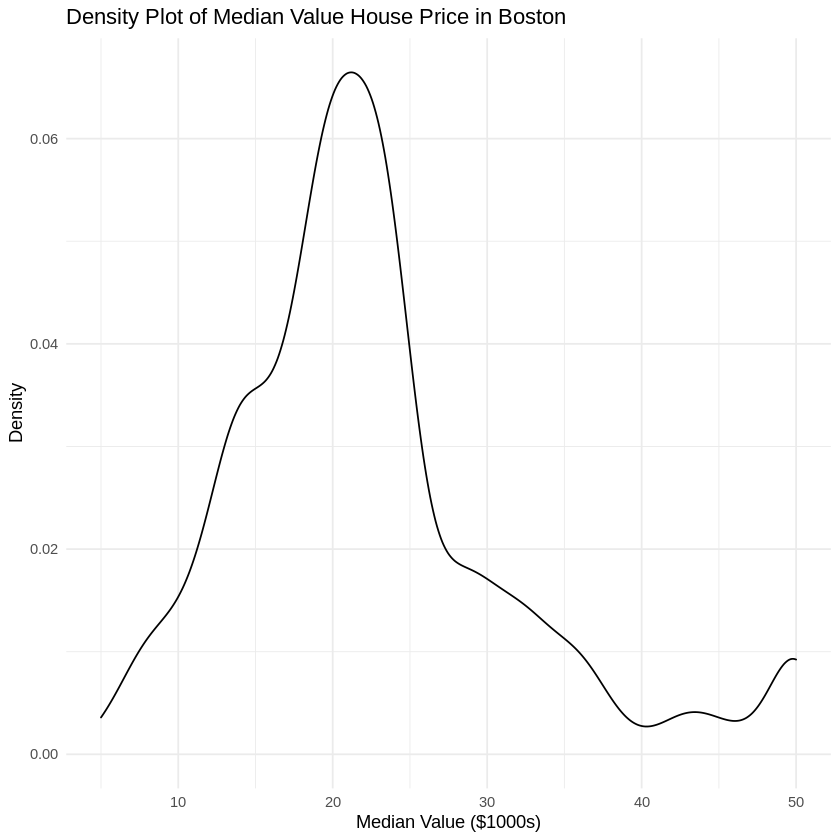

In [ ]:
ggplot(BostonHousing, aes(x=medv)) + geom_density() + labs(x = "Median Value ($1000s)", y = "Density", title = "Density Plot of Median Value House Price in Boston") +
  theme_minimal()

**Data Correlation**

Pearson Correlation

In [ ]:
cor(BostonHousing$medv,BostonHousing$rm,method='pearson')

[1] 0.6953599

In [ ]:
cor.test(BostonHousing$medv,BostonHousing$rm,method='pearson')


	Pearson's product-moment correlation

data:  BostonHousing$medv and BostonHousing$rm
t = 21.722, df = 504, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6474346 0.7378075
sample estimates:
      cor 
0.6953599 


Spearman Correlation


In [ ]:
cor(BostonHousing$medv,BostonHousing$age,method='spearman')

[1] -0.5475617

In [ ]:
cor.test(BostonHousing$medv,BostonHousing$age,method='spearman')

Warning message in cor.test.default(BostonHousing$medv, BostonHousing$age, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  BostonHousing$medv and BostonHousing$age
S = 33415393, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.5475617 


Kendall Rank Correlation

In [ ]:
cor(BostonHousing$medv,BostonHousing$zn,method='kendall')

[1] 0.3399893

In [ ]:
cor.test(BostonHousing$medv,BostonHousing$zn,method='kendall')


	Kendall's rank correlation tau

data:  BostonHousing$medv and BostonHousing$zn
z = 9.92, p-value < 2.2e-16
alternative hypothesis: true tau is not equal to 0
sample estimates:
      tau 
0.3399893 


**Splitting Data**

In [ ]:
set.seed(100)


In [ ]:
TrainingIndex <- createDataPartition(BostonHousing$medv, p=0.8, list = FALSE)
TrainingSet <- BostonHousing[TrainingIndex,] # Training Set
TestingSet <- BostonHousing[-TrainingIndex,] # Test Set

**Building Model to be trained**

In [ ]:
Model <- train(medv ~ ., data = TrainingSet,
               method = "lm",
               na.action = na.omit,
               preProcess=c("scale","center"),
               trControl= trainControl(method="none"))

Making Predictions on Training and Testing Dataset

In [ ]:
Model.training <-predict(Model, TrainingSet)
Model.testing <-predict(Model, TestingSet)

In [ ]:
summary(Model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0758  -2.7524  -0.4516   1.6274  24.7766 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.5673     0.2356  95.795  < 2e-16 ***
crim         -0.7458     0.3167  -2.355 0.018996 *  
zn            1.5326     0.3779   4.056 6.03e-05 ***
indus         0.3831     0.5034   0.761 0.447068    
chas1         0.7384     0.2446   3.019 0.002701 ** 
nox          -1.9412     0.5013  -3.872 0.000126 ***
rm            2.1695     0.3256   6.664 9.03e-11 ***
age           0.3776     0.4312   0.876 0.381723    
dis          -3.1560     0.4923  -6.411 4.16e-10 ***
rad           2.4712     0.6411   3.855 0.000135 ***
tax          -2.3099     0.7309  -3.160 0.001698 ** 
ptratio      -2.0585     0.3238  -6.357 5.71e-10 ***
b             0.6942     0.2747   2.527 0.011900 *  
lstat        -4.3102     0.4057 -10.623  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0

**Plotting Model Performance**



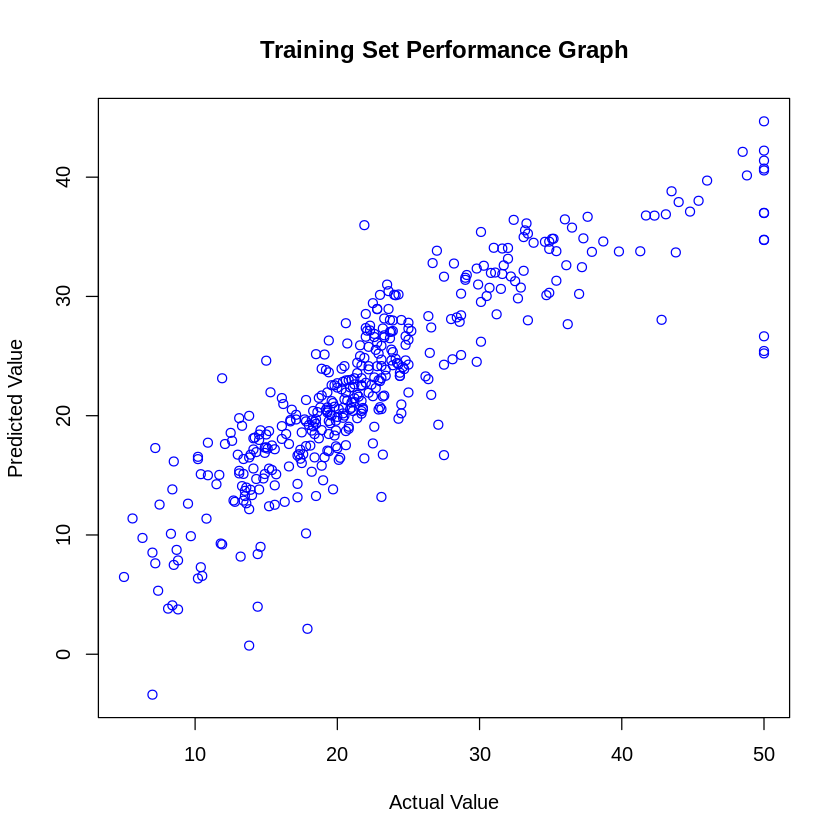

In [ ]:
plot(TrainingSet$medv,Model.training, col = "blue" , main="Training Set Performance Graph", xlab="Actual Value", ylab="Predicted Value")

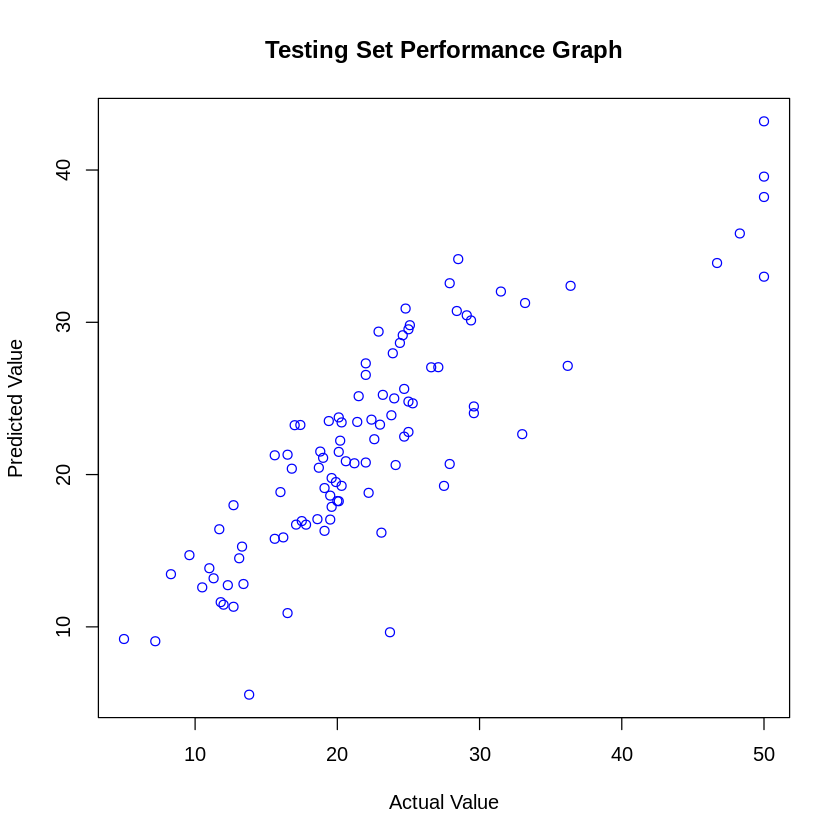

In [ ]:
plot(TestingSet$medv,Model.testing, col = "blue",  main="Testing Set Performance Graph", xlab="Actual Value", ylab="Predicted Value")

**Using** **Decision** **Tree**

In [ ]:
library(rpart)
library(rpart.plot)
decisionTree_model <- rpart(medv ~ . , TrainingSet, method = 'anova')

**Visualizing Decision Tree**

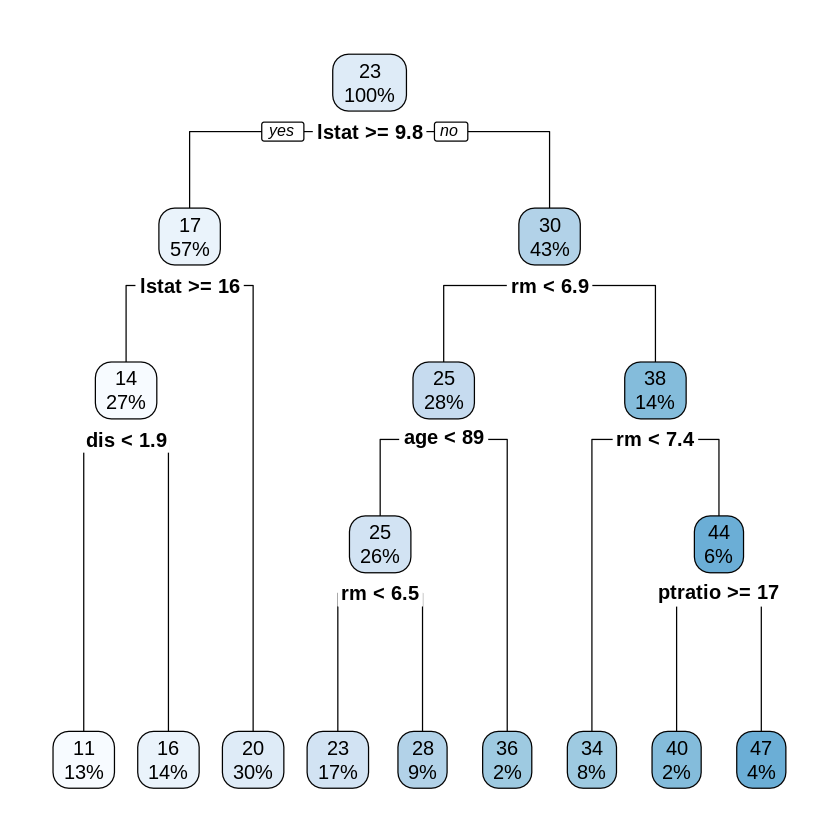

In [ ]:
rpart.plot(decisionTree_model)

The End